In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('russion_election2024.csv')

In [71]:
df.sample(5)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
869,071684a1198ce02c,male,36.0,volga,village,named correct date,definitely yes,Davankov,several times a month,less than 4 hours a day,college,medium,work for hire,commercial organization,"industry, manufacturing",0.815183
1295,07166ad4364ce8ca,female,76.0,siberian,city with population of less than 50k,named correct date,definitely yes,Putin,less than 4 hours a day,several times a week,bachelor degree,medium,unemployed pensioner,NaN,NaN,0.943168
671,07167456bb0cec8b,male,40.0,ural,city with population of less than 50k,named correct date,definitely yes,Putin,does not watch,less than 4 hours a day,bachelor degree,medium,work for hire,commercial organization,farming,1.138295
968,071683896b4ceaf4,male,74.0,volga,city with population of 100-500k,named correct date,definitely yes,Putin,over 4 hours a day,several times a week,college,medium,unemployed pensioner,NaN,NaN,0.728657
677,071698c89fccebb1,female,29.0,southern,city with population of 100-500k,named correct date,definitely yes,Putin,over 4 hours a day,less than 4 hours a day,college,medium,work for hire,commercial organization,"Сфера услуг, сервиса, бытового обслуживания Вк...",0.984037


In [4]:
ls =df.nunique()
for i in ls.index:
    if ls[i] > 10:
      print('{0} has {1} unique values'.format( i, ls[i]))
    else:
      print('{0} has {1} unique values - {2}'.format( i, ls[i], df[i].unique()))

id has 1600 unique values
sex has 2 unique values - ['male' 'female']
age has 71 unique values
federal_district has 8 unique values - ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']
type_of_city has 7 unique values - ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']
knows_election_date has 4 unique values - ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']
will_vote has 6 unique values - ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'struggle to answer']
candidate has 7 unique values - ['Putin' 'Davankov' 'will not take part' 'spoilt vote' 'Kharitonov'
 'struggle to answer' 'Slutskiy']
television_usage has 6 unique values - ['several times a week' 'once half a year' 'does not watch'
 'less than 4 hours a day' 'ove

<Axes: xlabel='candidate', ylabel='Count'>

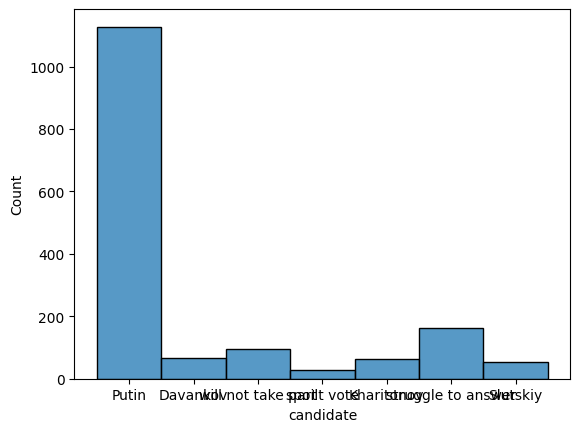

In [5]:
sns.histplot(df['candidate'])

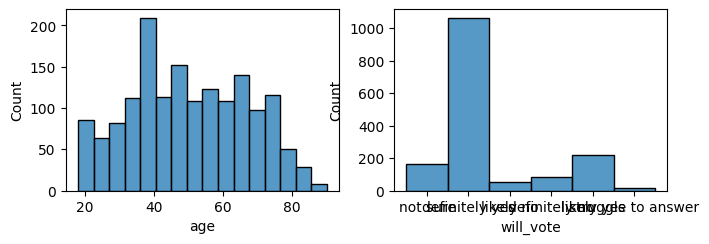

In [6]:
ls =['age','will_vote']
pl=1
plt.figure(figsize=(12, 8))
for i in ls:
    plt.subplot(3,3,pl)
    pl +=1
    sns.histplot(df[i])

In [7]:
can_filter=['Putin' ,'Davankov' ,'Kharitonov' ,'Slutskiy']
df=df[df['candidate'].isin(can_filter)]

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Categorical_features=['sex', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type']
Categorical_trans = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent'))
  , ('onehot',OneHotEncoder(handle_unknown='ignore'))
  ])

Numeric_features =['age','weight1']
Nummeric_trans = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean'))
    ,('scale',StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
          ('Num', Nummeric_trans ,Numeric_features)
          ,('Cat',  Categorical_trans ,Categorical_features)
          ])

In [9]:
X_arr_transformed = preprocessor.fit_transform(df)  #apply imputer & other preprocessing

# Convert the transformed data back to a DataFrame
categorical_feature_transformed =  preprocessor.named_transformers_['Cat']['onehot'].get_feature_names_out(Categorical_features)
feature_transformed = list(Numeric_features) + list(categorical_feature_transformed)

X_df_transformed = pd.DataFrame(X_arr_transformed.toarray(), columns=feature_transformed)  # Create the transformed DataFrame
X_df_not_transformed = df.drop(columns=Numeric_features + Categorical_features).reset_index(drop=True)  # Combine with the remaining columns
X_df_final = pd.concat([X_df_not_transformed, X_df_transformed], axis=1)
X_df_final.head(10)

,id,candidate,company_type,age,weight1,sex_female,sex_male,federal_district_central,federal_district_far eastern,federal_district_north caucasian,...,employment_unemployed,employment_unemployed pensioner,employment_unemployed student,employment_work for hire,job_type_commercial organization,job_type_government agency,"job_type_government, management, judicial bodies",job_type_hard to say,job_type_law enforcement agency,job_type_non-profit agency
0,07169ed8148ce047,Putin,farming,-1.941368,1.425604,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0716a4f3354cecdd,Putin,trade,-1.646691,1.425604,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0716889b304ce79c,Putin,law enforcement agency,-1.823497,0.975134,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,07168e28b5cce563,Davankov,NaN,-1.705626,1.719015,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0716a563914ce549,Putin,"tech, programming, communications",-1.764562,3.063960,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0716aac995cce5ae,Putin,refused to answer,-1.410949,0.428435,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,07169cf9604cee1c,Putin,"industry, manufacturing",-0.821595,-1.292589,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,07168daf680ceff8,Putin,other,-0.467982,-1.032400,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0716aa97fe4ce46d,Putin,NaN,-0.703724,-1.641575,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0716921d124ce8cd,Putin,housing and communal services,-0.880530,0.377261,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
hot=OneHotEncoder(handle_unknown='ignore')
df3= hot.fit_transform(df['candidate'].values.reshape(-1, 1))

feature_names = hot.get_feature_names_out(['candidate'])

y = pd.DataFrame(df3.toarray(), columns=feature_names)
y.head()

,candidate_Davankov,candidate_Kharitonov,candidate_Putin,candidate_Slutskiy
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df_transformed, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1050, 70)
(1050, 4)
(263, 70)


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hamming_loss, accuracy_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from datetime import datetime

# Define the models and their hyperparameters
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

model_params = {
    'Random Forest': { },
    'Gradient Boosting': {},
    'AdaBoost': {},
    'Logistic Regression': {},
    'Support Vector Machine': {},
    'Naive Bayes': {}
}

In [13]:
model_score = []

for name, model in models.items():
    print('################################################', datetime.now())
    print(name)

    ms = GridSearchCV(MultiOutputClassifier(model), model_params.get(name, {}), cv=3, scoring='accuracy')
    ms.fit(X_train, y_train)
    print(ms.best_params_)

    best_model = ms.best_estimator_
    best_model.fit(X_train, y_train)

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    model_train_hamming = hamming_loss(y_train, y_train_pred)
    model_test_hamming = hamming_loss(y_test, y_test_pred)
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='macro')
    model_test_f1 = f1_score(y_test, y_test_pred, average='macro')

    model_score.append({
        'Model': name,
        'Hamming Loss Train': model_train_hamming,
        'Hamming Loss Test': model_test_hamming,
        'Accuracy Train': model_train_accuracy,
        'Accuracy Test': model_test_accuracy,
        'F1 Score Train': model_train_f1,
        'F1 Score Test': model_test_f1
    })

    print(f'train score - Accuracy: {model_train_accuracy}, F1 Score: {model_train_f1}')
    print(f'test score - Accuracy: {model_test_accuracy}, F1 Score: {model_test_f1}')

################################################ 2024-07-19 16:45:43.982434
Random Forest
{}
train score - Accuracy: 1.0, F1 Score: 1.0
test score - Accuracy: 0.8479087452471483, F1 Score: 0.2561294540699575
################################################ 2024-07-19 16:45:58.190444
Gradient Boosting
{}
train score - Accuracy: 0.9104761904761904, F1 Score: 0.7569656988446797
test score - Accuracy: 0.8250950570342205, F1 Score: 0.2925858123569794
################################################ 2024-07-19 16:46:04.920207
AdaBoost
{}
train score - Accuracy: 0.8457142857142858, F1 Score: 0.3324710850543496
test score - Accuracy: 0.8250950570342205, F1 Score: 0.2702715098147129
################################################ 2024-07-19 16:46:09.332887
Logistic Regression
{}
train score - Accuracy: 0.8485714285714285, F1 Score: 0.26890975482524776
test score - Accuracy: 0.8403041825095057, F1 Score: 0.25416666666666665
################################################ 2024-07-19 16:46:09.93

In [14]:
results_df = pd.DataFrame(model_score).sort_values('F1 Score Test', ascending=False)
results_df

,Model,Hamming Loss Train,Hamming Loss Test,Accuracy Train,Accuracy Test,F1 Score Train,F1 Score Test
1,Gradient Boosting,0.035000,0.079848,0.910476,0.825095,0.756966,0.292586
2,AdaBoost,0.067857,0.080798,0.845714,0.825095,0.332471,0.270272
0,Random Forest,0.000000,0.073194,1.000000,0.847909,1.000000,0.256129
3,Logistic Regression,0.067143,0.076046,0.848571,0.840304,0.268910,0.254167
5,Naive Bayes,0.676429,0.697719,0.022857,0.007605,0.254420,0.231966
4,Support Vector Machine,0.069048,0.074144,0.860952,0.851711,0.231557,0.229979


In [65]:
basemodel = SVC() #RandomForestClassifier()
model = MultiOutputClassifier(basemodel)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

model_test_hamming = hamming_loss(y_test, y_test_pred)
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='macro')

print('test_accuracy {0} test f1 {1}'.format(model_test_accuracy, model_test_f1))

test_accuracy 0.8517110266159695 test f1 0.2299794661190965


In [66]:
y_test_pred_df = pd.DataFrame(y_test_pred, columns=feature_names)
y_test_pred_df = y_test_pred_df.rename(columns={col: 'pred_' + col for col in y_test_pred_df.columns})

y_test_df = pd.DataFrame(hot.inverse_transform(y_test), columns=['candidate_test'])     # convert the onehot encode back to text.
y_pred_df = pd.DataFrame(hot.inverse_transform(y_test_pred_df), columns=['candidate_pred'])

X_test_verify = pd.concat([y_test_df, y_pred_df , X_test.reset_index() ], axis=1)

In [17]:
X_test_verify[(X_test_verify['candidate_test'] != X_test_verify['candidate_pred']) & (X_test_verify['candidate_pred'] != 'Putin')]

,candidate_test,candidate_pred,index,age,weight1,sex_female,sex_male,federal_district_central,federal_district_far eastern,federal_district_north caucasian,...,employment_unemployed,employment_unemployed pensioner,employment_unemployed student,employment_work for hire,job_type_commercial organization,job_type_government agency,"job_type_government, management, judicial bodies",job_type_hard to say,job_type_law enforcement agency,job_type_non-profit agency
4,Putin,None,1177,-1.469885,2.081932,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
14,Putin,None,1278,-1.882433,-0.008905,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31,Davankov,None,1001,-0.821595,-0.902079,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
42,Putin,Davankov,526,-1.941368,-0.358485,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49,Putin,Kharitonov,867,-0.644789,-1.197071,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
107,Putin,Kharitonov,1002,-0.821595,-1.197071,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
137,Putin,None,1291,-0.880530,0.086676,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
157,Kharitonov,None,490,-0.998401,4.784617,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
210,Putin,None,1072,-0.644789,-1.466030,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
238,Slutskiy,Davankov,785,-1.175208,-0.851462,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


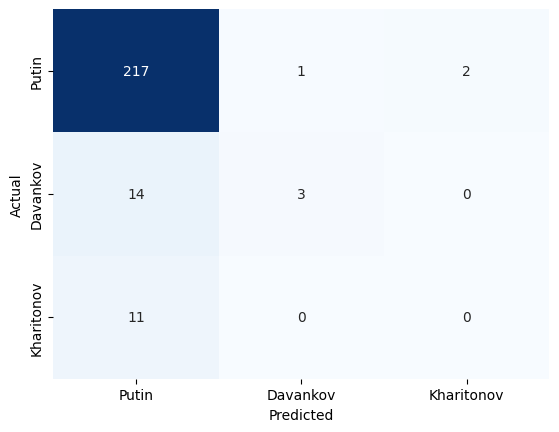

In [25]:
from sklearn.metrics import confusion_matrix

X_test_verify_cm = X_test_verify.dropna()        #None values gives error. remove them
cm = confusion_matrix(X_test_verify_cm['candidate_test'], X_test_verify_cm['candidate_pred'], labels=X_test_verify_cm['candidate_pred'].unique())

cm_df = pd.DataFrame(cm, index=X_test_verify_cm['candidate_pred'].unique(), columns=X_test_verify_cm['candidate_pred'].unique())
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

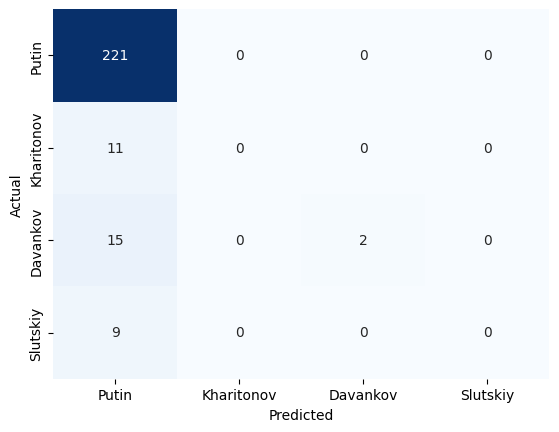

In [63]:
from sklearn.metrics import confusion_matrix

X_test_verify_cm = X_test_verify.dropna()        #None values gives error. remove them
cm = confusion_matrix(X_test_verify_cm['candidate_test'], X_test_verify_cm['candidate_pred'], labels=X_test_verify_cm['candidate_test'].unique())

cm_df = pd.DataFrame(cm, index=X_test_verify_cm['candidate_test'].unique(), columns=X_test_verify_cm['candidate_test'].unique())
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

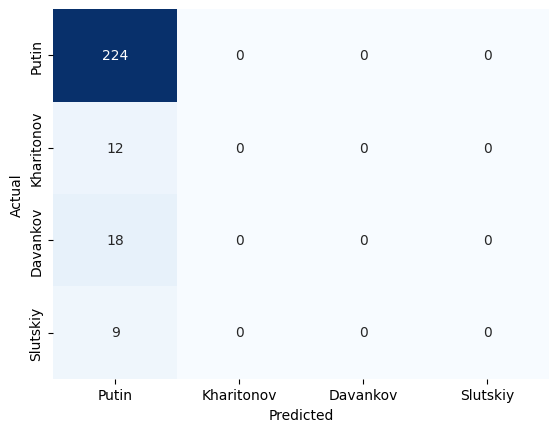

In [67]:
#SVM
from sklearn.metrics import confusion_matrix

X_test_verify_cm = X_test_verify.dropna()        #None values gives error. remove them
cm = confusion_matrix(X_test_verify_cm['candidate_test'], X_test_verify_cm['candidate_pred'], labels=X_test_verify_cm['candidate_test'].unique())

cm_df = pd.DataFrame(cm, index=X_test_verify_cm['candidate_test'].unique(), columns=X_test_verify_cm['candidate_test'].unique())
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
X_test_verify.groupby(['candidate_test', 'candidate_pred']).size()

candidate_test  candidate_pred
Davankov        Davankov            2
                Putin              15
Kharitonov      Putin              11
Putin           Putin             221
Slutskiy        Putin               9
dtype: int64

<Axes: >

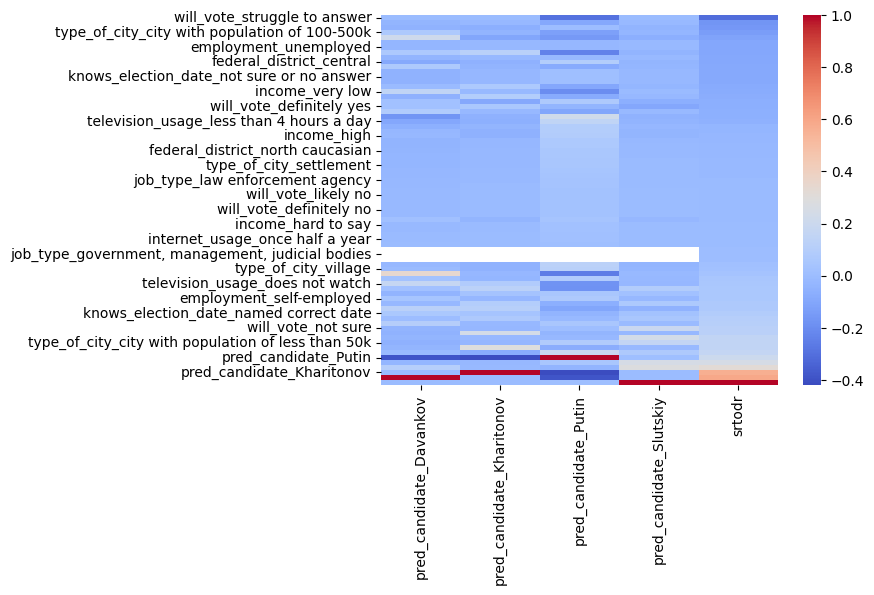

In [41]:
#tmp=pd.concat([X_df_final , y], axis=1)
#X_test_verify = pd.concat([y_test_df, y_pred_df , X_test.reset_index() ], axis=1)
tmp = pd.concat([ y_test_pred_df , X_test.reset_index() ], axis=1)
tmpcor = tmp.corr()[y_test_pred_df.columns]
tmpcor['srtodr'] = tmpcor[y_test_pred_df.columns].sum(axis=1)
sns.heatmap(tmpcor.sort_values('srtodr') , cmap='coolwarm')


In [47]:
tmpcor.sort_values('pred_candidate_Putin', ascending=False).head(50)

,pred_candidate_Davankov,pred_candidate_Kharitonov,pred_candidate_Putin,pred_candidate_Slutskiy,srtodr
pred_candidate_Putin,-0.388154,-0.418985,1.000000,0.012908,0.205768
age,-0.173968,-0.055907,0.219627,-0.048619,-0.058866
education_college,-0.011514,-0.077762,0.185595,0.069547,0.165867
television_usage_less than 4 hours a day,-0.097877,-0.061546,0.146892,-0.043436,-0.055966
television_usage_over 4 hours a day,-0.020840,-0.052719,0.125825,-0.037207,0.015060
type_of_city_village,-0.010534,-0.048104,0.114811,-0.033950,0.022223
employment_unemployed pensioner,-0.030483,-0.057359,0.095467,-0.040481,-0.032856
federal_district_central,-0.091218,-0.057359,0.095467,-0.040481,-0.093591
internet_usage_does not use internet,-0.063249,-0.039772,0.094924,-0.028069,-0.036166
income_high,-0.024114,-0.054260,0.087088,-0.038294,-0.029580
